# Opens DQM and makes nice plots from EGamma validation (Gsf efficiency, etc)

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("/grid_mnt/vol_home/llr/cms/cuisset/hgcal/supercls/repoForJobs")
import uproot
import hist
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import mplhep as hep
plt.style.use(hep.style.CMS)
from analyzer.dumperReader.dqmReader import DQMReader

In [2]:
baseline_dqm = DQMReader("/grid_mnt/data_cms_upgrade/cuisset/supercls/superclsPR/NewElectronsD98/baseline-v1/DQM_baseline_30samples.root")
mustache_dqm = DQMReader("/grid_mnt/data_cms_upgrade/cuisset/supercls/superclsPR/NewElectronsD98/ticlMustache-bc18/DQM_V0001_R000000001__Global__CMSSW_X_Y_Z__RECO.root")
dnn_doublePid_dqm = DQMReader("/grid_mnt/data_cms_upgrade/cuisset/supercls/superclsPR/NewElectronsD98/dnn-bc18/DQM_V0001_R000000001__Global__CMSSW_X_Y_Z__RECO.root")
dnn_dqm = DQMReader("/grid_mnt/data_cms_upgrade/cuisset/supercls/superclsPR/NewElectronsD98/dnn-b3db/DQM_V0001_R000000001__Global__CMSSW_X_Y_Z__RECO.root")

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Simulation Preliminary'),
 supptext: Custom Text(1.012, 1, ''))

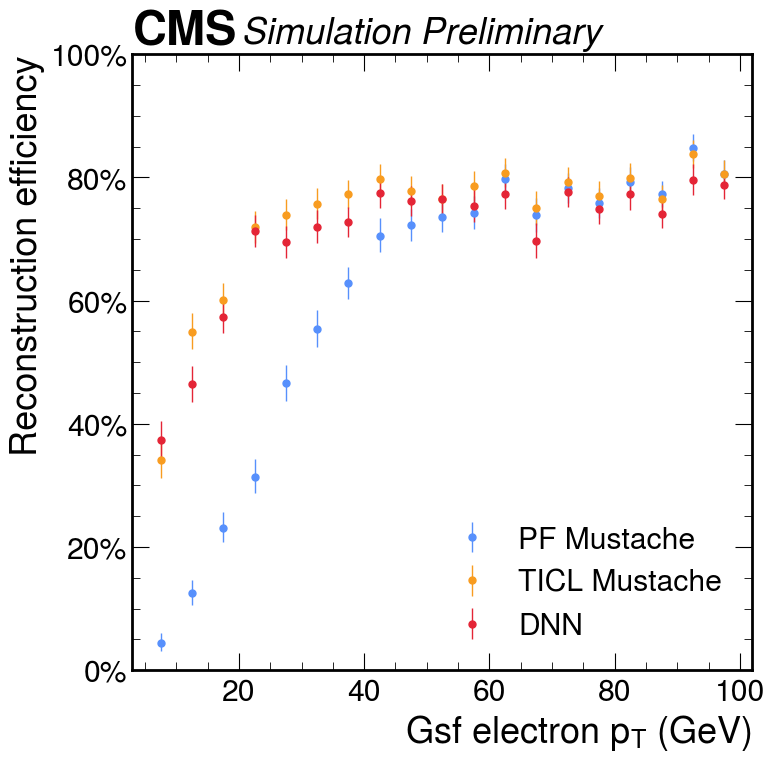

In [13]:
plt.figure(figsize=(8, 8))
hep.histplot([baseline_dqm.egammaV.ptEff, mustache_dqm.egammaV.ptEff, dnn_dqm.egammaV.ptEff], flow="none", histtype="errorbar", label=["PF Mustache", "TICL Mustache", "DNN"])
plt.xlabel("Gsf electron $p_T$ (GeV)")
plt.ylabel("Reconstruction efficiency")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.ylim(0, 1)
plt.legend()
hep.cms.label("Preliminary", rlabel="")

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Simulation Preliminary'),
 supptext: Custom Text(1.012, 1, ''))

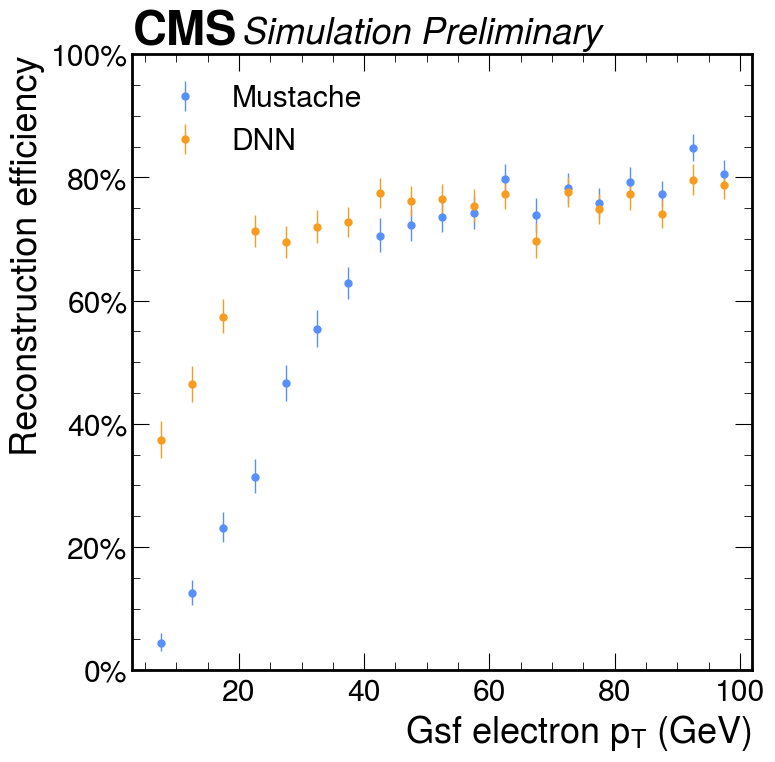

In [11]:
plt.figure(figsize=(8, 8))
hep.histplot([baseline_dqm.egammaV.ptEff, dnn_dqm.egammaV.ptEff], flow="none", histtype="errorbar", label=["Mustache", "DNN"])
plt.xlabel("Gsf electron $p_T$ (GeV)")
plt.ylabel("Reconstruction efficiency")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.ylim(0, 1)
plt.legend()
hep.cms.label("Preliminary", rlabel="")

(1.5, 3.095)

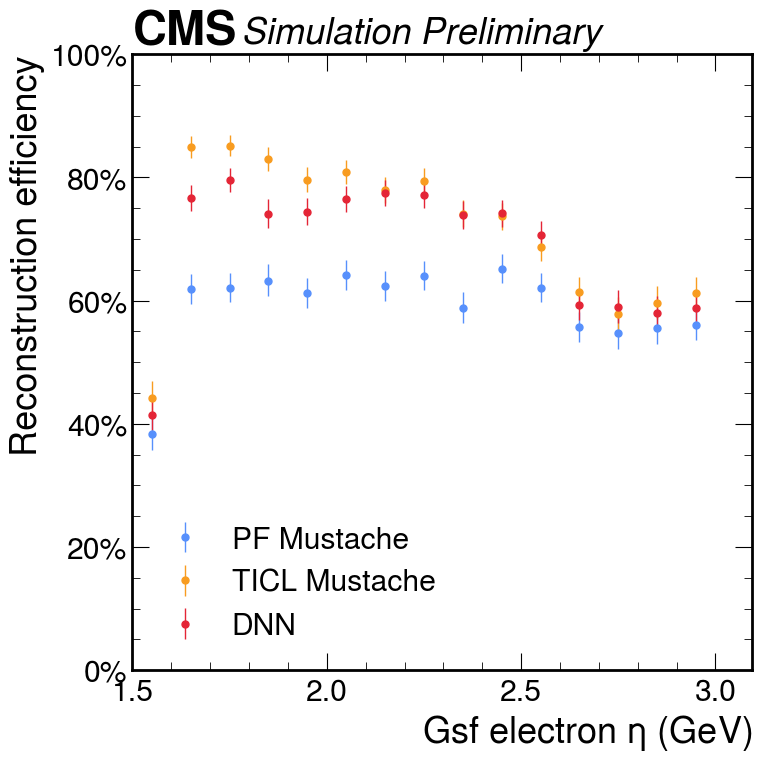

In [14]:
plt.figure(figsize=(8, 8))
hep.histplot([baseline_dqm.egammaV.absEtaEff, mustache_dqm.egammaV.absEtaEff, dnn_dqm.egammaV.absEtaEff], flow="none", histtype="errorbar", label=["PF Mustache", "TICL Mustache", "DNN"])
plt.xlabel(r"Gsf electron $\eta$ (GeV)")
plt.ylabel("Reconstruction efficiency")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.ylim(0, 1)
plt.legend()
hep.cms.label("Preliminary", rlabel="")
plt.xlim(1.5)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'),
 supptext: Custom Text(1.012, 1, ''))

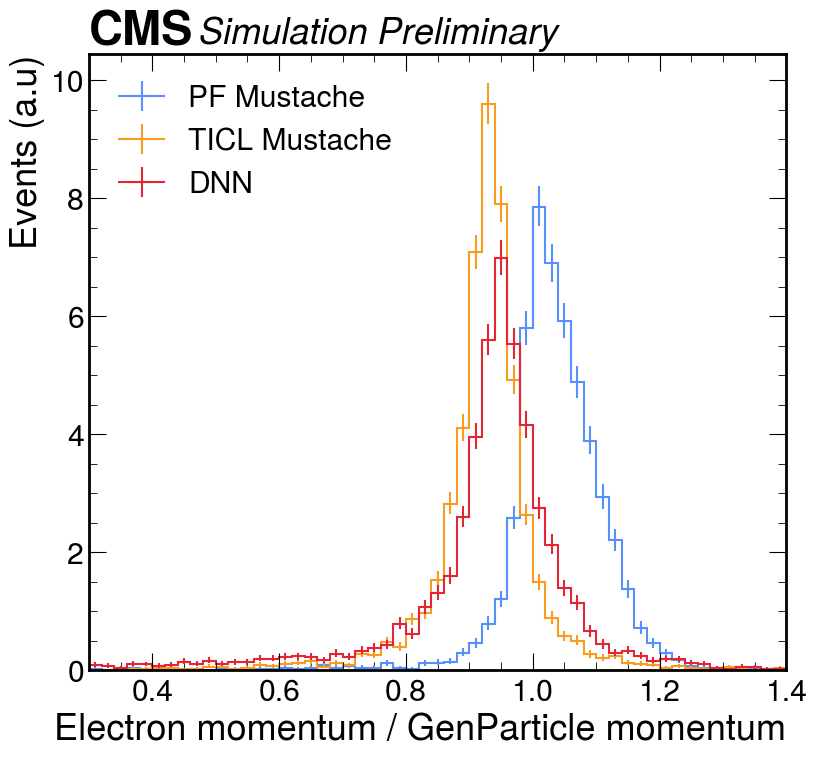

In [12]:
plt.figure(figsize=(9, 8))
hep.histplot([baseline_dqm.egammaV.electronValidator["h_ele_PoPtrue_endcaps"], mustache_dqm.egammaV.electronValidator["h_ele_PoPtrue_endcaps"], dnn_dqm.egammaV.electronValidator["h_ele_PoPtrue_endcaps"]],
             flow="none", histtype="step", label=["PF Mustache", "TICL Mustache", "DNN"], density=True)
plt.xlabel("Electron momentum / GenParticle momentum")
plt.ylabel("Events (a.u)")
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
#plt.ylim(0, 1)
plt.xlim(0.3, 1.4)
plt.legend()
hep.cms.label("Preliminary", rlabel="")

In [15]:
baseline_dqm.egammaV.electronValidator["h_ele_PoPtrueVsEta_Extended"].to_hist()

Hist(
  Regular(60, -3, 3, name='xaxis'),
  Regular(50, 0, 1.5, name='yaxis'),
  storage=Double()) # Sum: 3544.0 (3550.0 with flow)

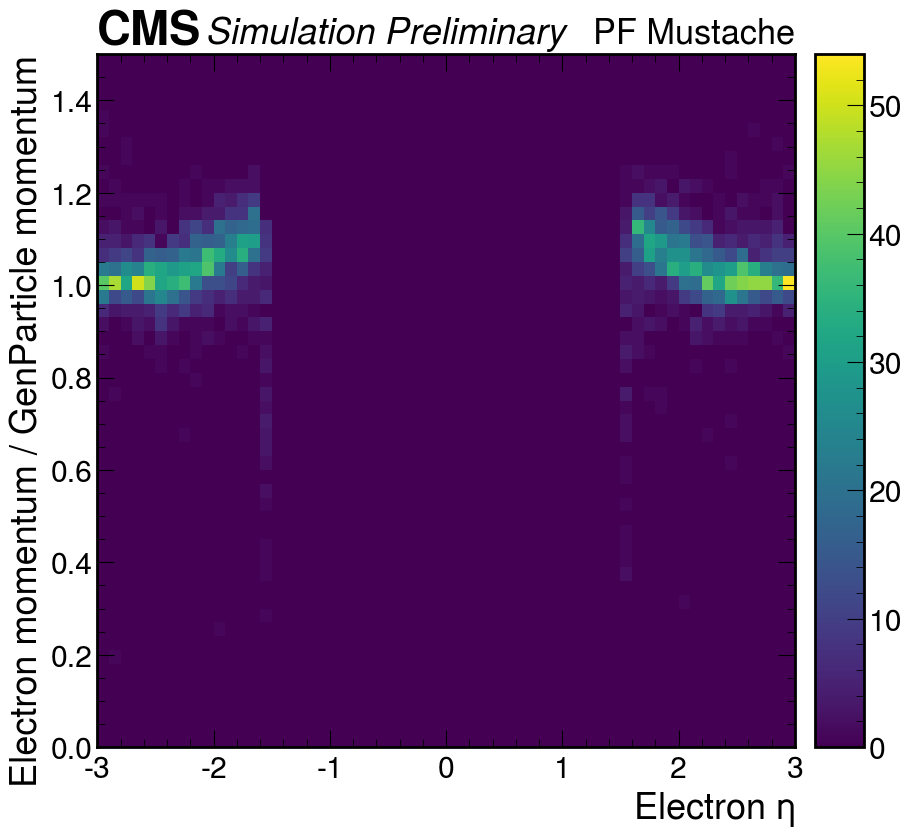

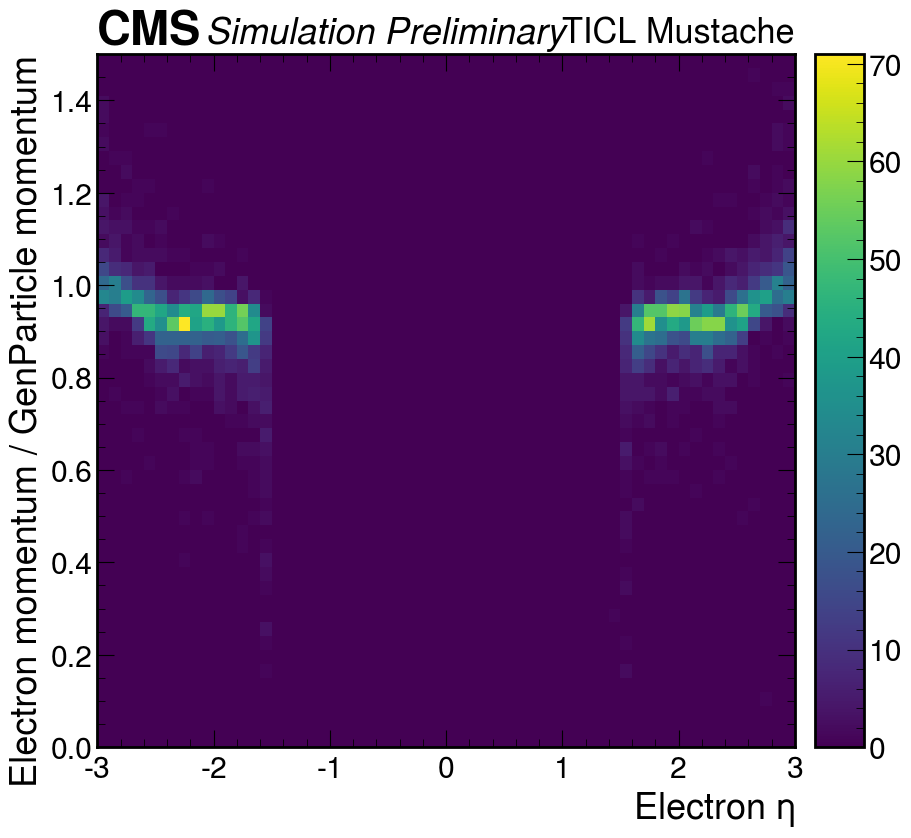

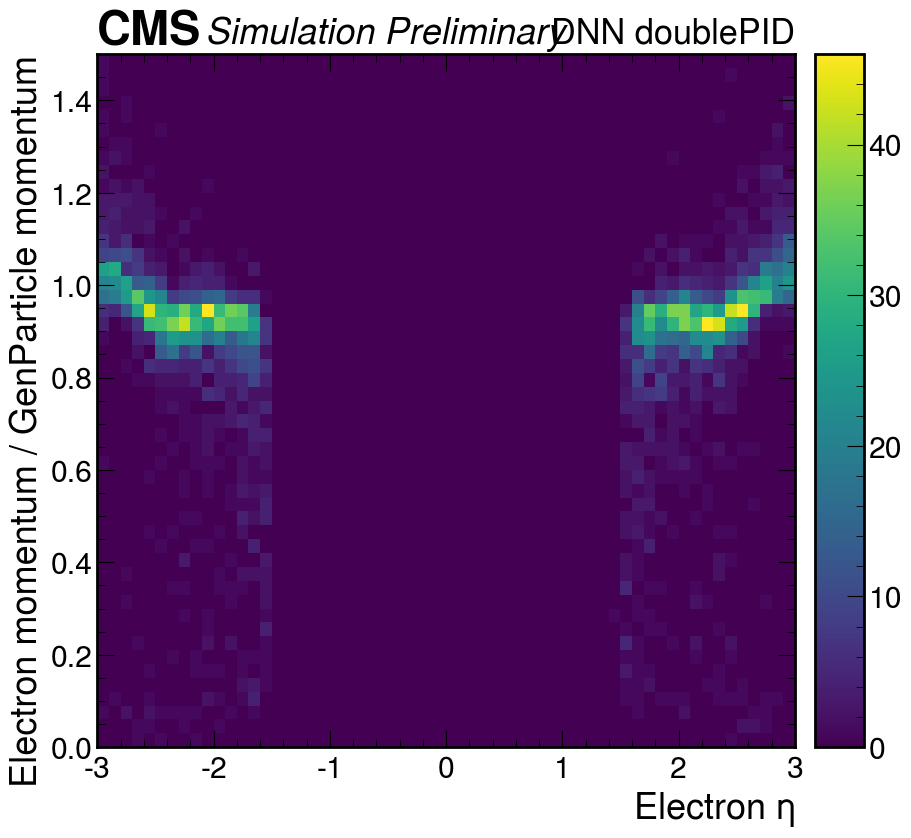

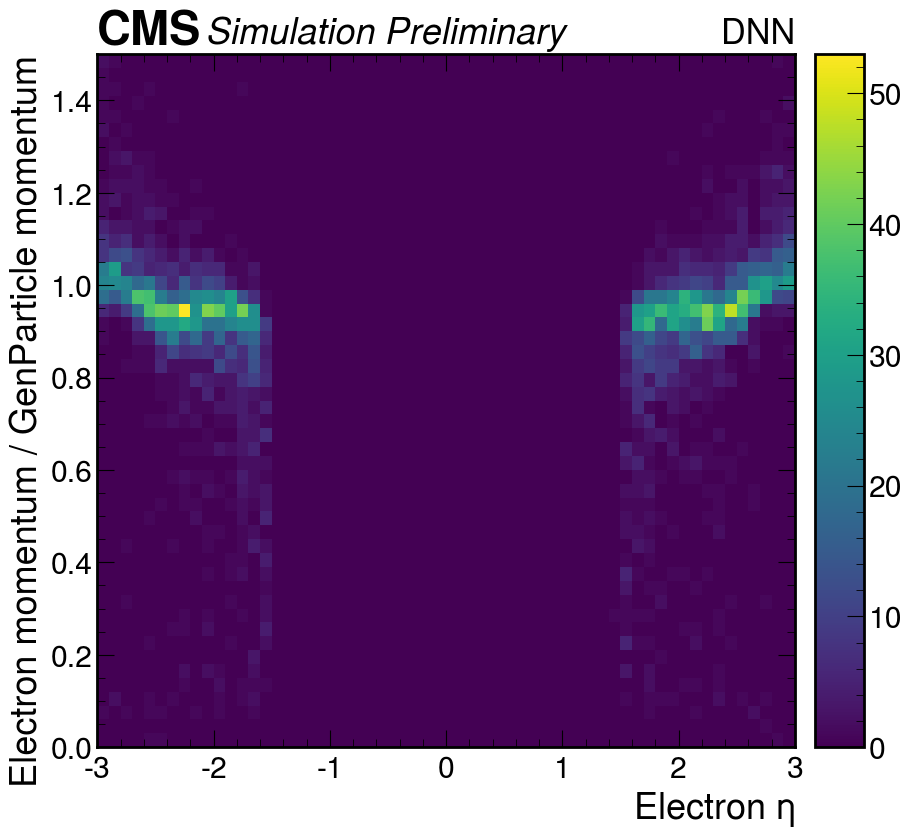

In [21]:
hists = [baseline_dqm.egammaV.electronValidator["h_ele_PoPtrueVsEta_Extended"], mustache_dqm.egammaV.electronValidator["h_ele_PoPtrueVsEta_Extended"], dnn_doublePid_dqm.egammaV.electronValidator["h_ele_PoPtrueVsEta_Extended"], dnn_dqm.egammaV.electronValidator["h_ele_PoPtrueVsEta_Extended"]]
labels = ["PF Mustache", "TICL Mustache", "DNN doublePID", "DNN"]
for h, label in zip(hists, labels):
    plt.figure(figsize=(9, 9))
    hep.hist2dplot(h, flow="none", label=label,)
    plt.xlabel("Electron $\eta$")
    plt.ylabel("Electron momentum / GenParticle momentum")
    #plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
    #plt.ylim(0, 1)
    #plt.xlim(0.3, 1.4)
    #plt.legend()
    hep.cms.label("Preliminary", rlabel=label)

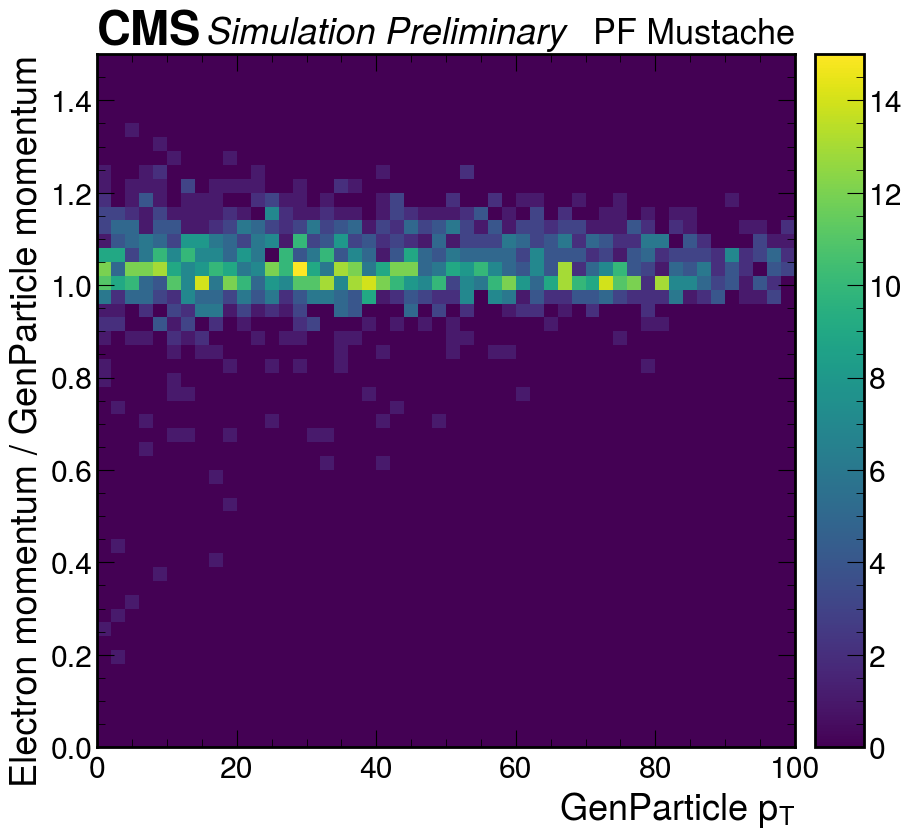

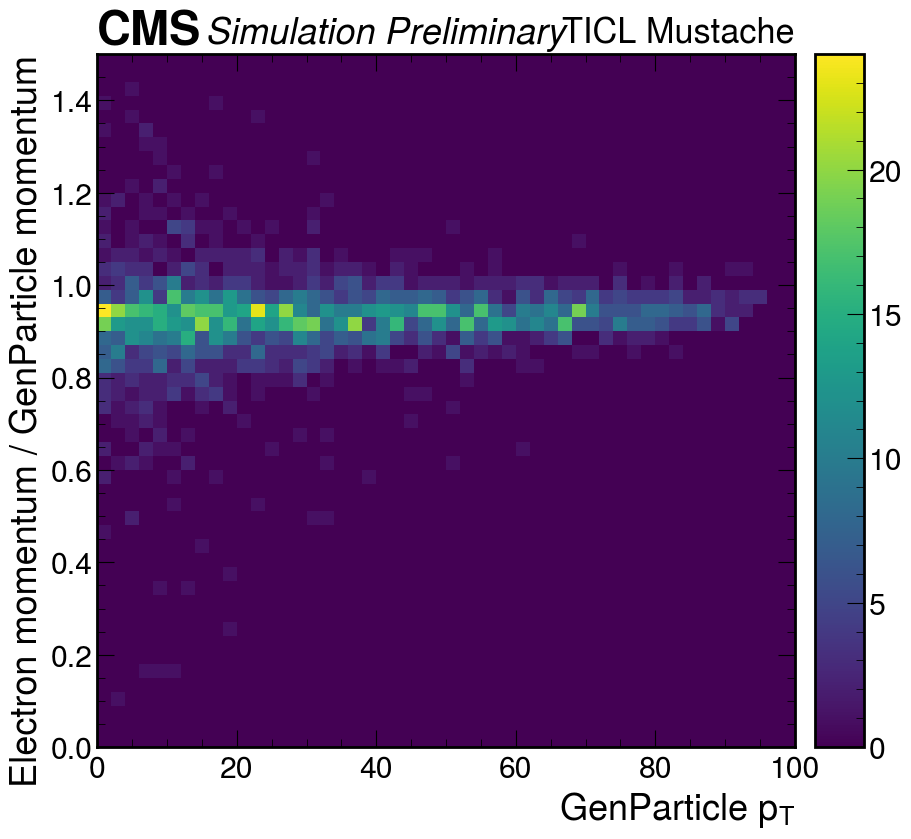

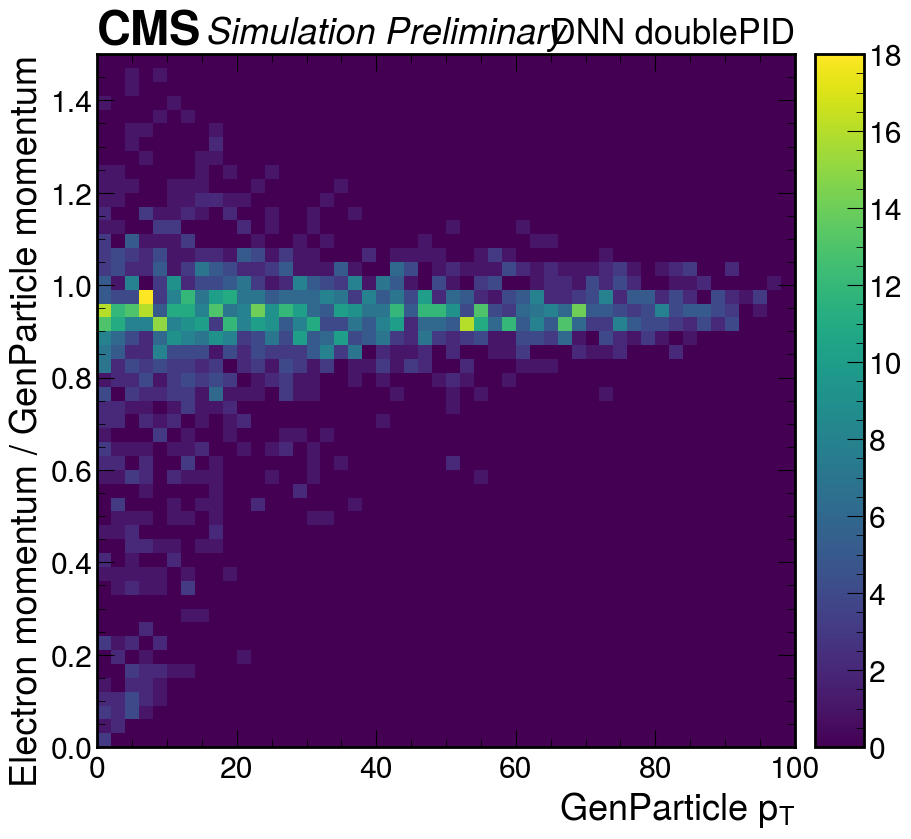

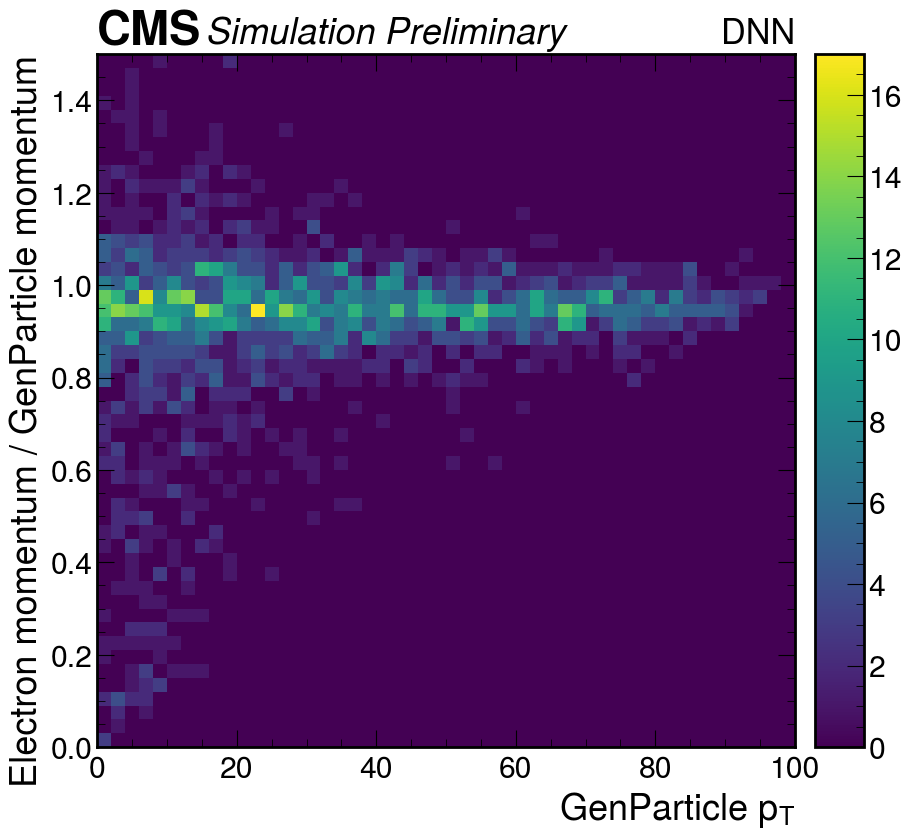

In [26]:
hists = [baseline_dqm.egammaV.electronValidator["h_ele_PoPtrueVsPt"], mustache_dqm.egammaV.electronValidator["h_ele_PoPtrueVsPt"], dnn_doublePid_dqm.egammaV.electronValidator["h_ele_PoPtrueVsPt"], dnn_dqm.egammaV.electronValidator["h_ele_PoPtrueVsPt"]]
labels = ["PF Mustache", "TICL Mustache", "DNN doublePID", "DNN"]
for h, label in zip(hists, labels):
    plt.figure(figsize=(9, 9))
    hep.hist2dplot(h, flow="none", label=label,)
    plt.xlabel("GenParticle $p_T$")
    plt.ylabel("Electron momentum / GenParticle momentum")
    #plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
    #plt.ylim(0, 1)
    #plt.xlim(0.3, 1.4)
    #plt.legend()
    hep.cms.label("Preliminary", rlabel=label)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'),
 supptext: Custom Text(1.012, 1, ''))

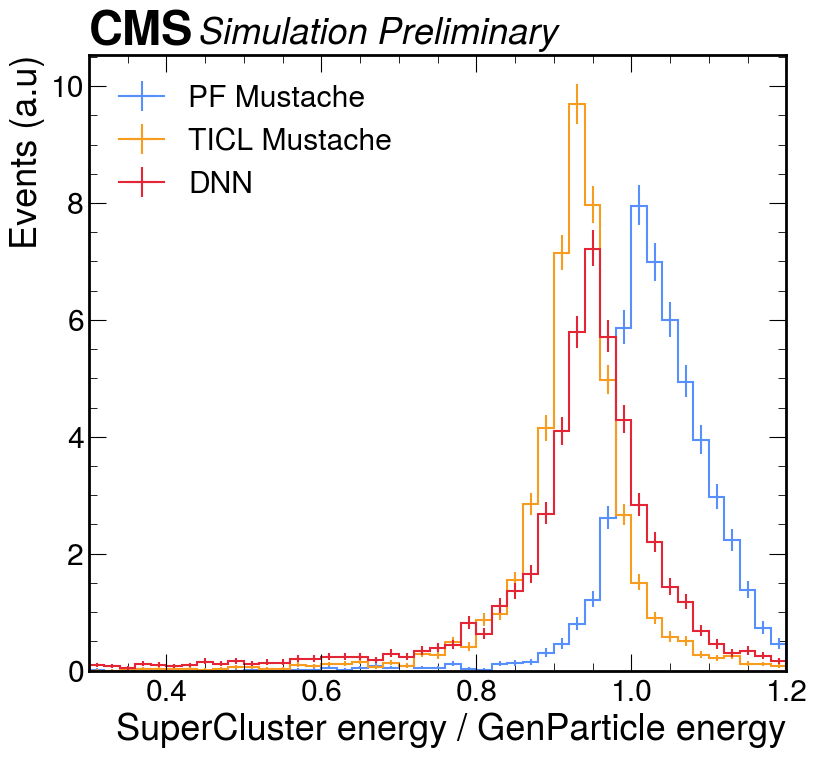

In [24]:
plt.figure(figsize=(9, 8))
hep.histplot([baseline_dqm.egammaV.electronValidator["h_scl_EoEtrue_endcaps"], mustache_dqm.egammaV.electronValidator["h_scl_EoEtrue_endcaps"], dnn_dqm.egammaV.electronValidator["h_scl_EoEtrue_endcaps"]],
             flow="none", histtype="step", label=["PF Mustache", "TICL Mustache", "DNN"], density=True)
plt.xlabel("SuperCluster energy / GenParticle energy")
plt.ylabel("Events (a.u)")
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
#plt.ylim(0, 1)
plt.xlim(0.3, 1.2)
plt.legend()
hep.cms.label("Preliminary", rlabel="")